<a href="https://colab.research.google.com/github/HanifFaishalH/MachineLearning/blob/main/JS07_2341720116_Hanif_Faishal_Hilmi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **JS07 - Approximate Nearest Neighbors (ANN)**

Nama : Hanif Faishal Hilmi

Kelas : TI-3F

Absen : 15

## **Praktikum 1**

Exact NN vs. ANNOY

### Langkah 1 - Install Library ANNOY

In [1]:
%pip install annoy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Langkah 2 - Import Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

### Langkah 3 - Membuat Dataset Dummy

Pada langkah ini Anda akan membuat dataset dummy dan memilih titik awal untuk cluster (query point).

In [3]:
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100

query = X[np.random.randint(0, n_points)]

### Langkah 4 - Exact NN

Pada langkah ini Anda akan membuat dataset dummy dan memilih titik awal untuk cluster (query point).

In [4]:
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]
time_exact = time.time() - start


print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 1.5066 ms


### Langkah 5 - Perhitungan Jarak dengan ANNOY

Selanjutnya, bandingkan dengan ANNOY. Jumlah Tree yang digunakan adalah 3.

In [5]:
f = 2 #dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
  t.add_item(i, vec)

t.build(3) # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3) # cari 3 NN
time_ann = time.time() - start


print("Exact NN index:", idx_ann)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_ann*1000, 4), "ms")

Exact NN index: [219, 898, 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 1.0061 ms


### Langkah 6 - Visualisasi Hasil NN
Untuk mengetahui tingkat ketepatan prediksi NN dari ANNOY, lakukan proses visualisasi sehingga Anda dapat mengetahui titik exact NN dibandingkan dengan perkiraan NN dari ANNOY.

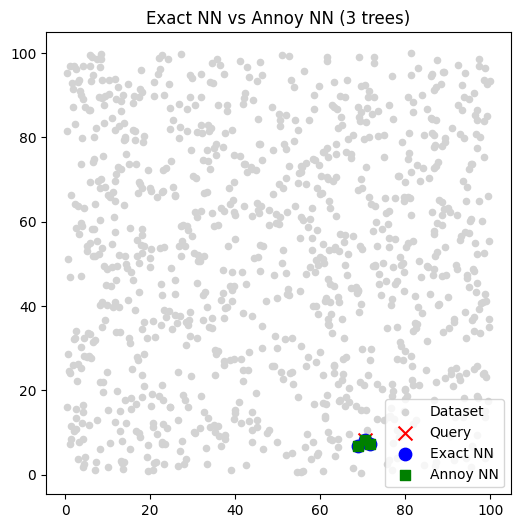

In [6]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

## **Praktikum 2**

Exact NN vs. FAISS

### Langkah 1 - Instal FAISS

In [7]:
%pip install faiss-cpu
%pip install faiss-gpu

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement faiss-gpu (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for faiss-gpu


### Langkah 2 - Import Library

In [8]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

### Langkah 3 - Membuat Dummy Dataset

In [9]:
# Build random data
np.random.seed(42)
X = np.random.rand(1000, 2).astype('float32')  # 1000 data 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query point

### Langkah 4 - Buat Model Exact NN

In [10]:
# Search NN using Exact NN
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

# Compute Exact NN Time
start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # Find 3 NN
end = time.time()
time_flat = end - start

### Langkah 5 - Buat Model FAISS


In [11]:
# Compute FAISS
nlist = 10   # n-cluster (inverted list)
m = 2        # number of subvector
quantizer = faiss.IndexFlatL2(2)   # used by IVF for initiatl cluster
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

### Langkah 6 - Cek Hasil Performa

In [12]:
# Print The Peformances
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.0009999275207519531
Waktu IVF+PQ: 0.00069427490234375


### Langkah 7 - Visualisasi
Untuk lebih jelas mengetahui perkiraan NN yang dibuat oleh FAISS, Anda dapat melakukan visualisasi.

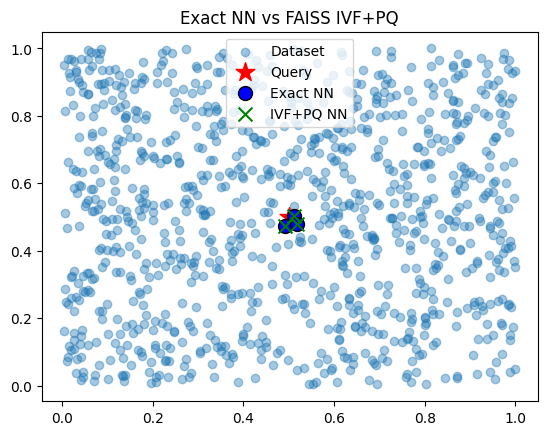

In [13]:
# Visualize
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Flat NN -> Exact NN
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# IVF+PQ NN -> FAISS
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Exact NN vs FAISS IVF+PQ")
plt.show()

## Praktikum 3
Exact NN vs. HNSW

### Langkah 1 - Instal Library

In [14]:
%pip install hnswlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Langkah 2 - Import Library

In [15]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

### Langkah 3 - Buat Dataset Dummy


In [16]:
num_elements = 1000
dim = 2
data = np.random.random((num_elements, dim)).astype('float32')

query = np.array([[0.5, 0.5]]).astype('float32')
k = 5

### Langkah 4 - Buat Model NN

In [17]:
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "s")

=== Exact NN ===
Indices: [[830 247 473 913 592]]
Distances: [[0.00993625 0.01363944 0.01646171 0.03779694 0.03859071]]
Waktu: 1.8435249328613281 s


### Langkah 5 - Buat Model HNSW


In [18]:
# Initiate Index
p = hnswlib.Index(space='l2', dim=dim)

# Define Max Elements
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Add Data
p.add_items(data)

# Set searching parameter
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "s")


=== HNSW ===
Indices: [[830 247 473 913 592]]
Distances: [[9.8728990e-05 1.8603442e-04 2.7098786e-04 1.4286089e-03 1.4892431e-03]]
Waktu: 0.0 s


## **Praktikum 4**

ANNOY vs. FAISS vs. HNSW

In [19]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# Build 1mio rows with 5D
# ===============================
n_data = 1_000_000   # try 100_000 if you have limited memory
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# Annoy
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
  ann_index.add_item(i, X[i])
ann_index.build(10)
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# FAISS
print("\n=== FAISS (IndexFlatL2) ===")

faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")

# HNSW
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("\n=== HNSW ===")
print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")

=== Annoy ===
Build time: 3.4828317165374756 detik
Query time: 0.0 detik
Neighbors: [129179, 559276, 630783, 213191, 559393] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.0055310726165771484 detik
Query time: 0.003980875015258789 detik
Neighbors: [129179 559276 630783 213191 559393] ...

=== HNSW ===
Build time: 11.64024305343628 detik
Query time: 0.0 detik
Neighbors: [129179 559276 630783 213191 559393] ...


## Praktikum 5
Uji Performansi ANN dengan Recall Query

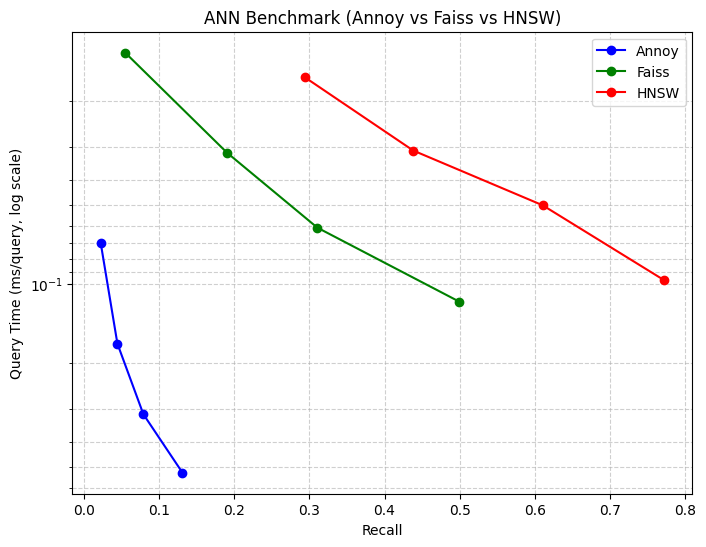

In [20]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import matplotlib.pyplot as plt

# -------------------------------
# Dataset random
# -------------------------------
d = 128        # dimensi
nb = 100000    # jumlah database vector
nq = 1000      # jumlah query

np.random.seed(42)
xb = np.random.random((nb, d)).astype('float32')
xq = np.random.random((nq, d)).astype('float32')

# -------------------------------
# Ground truth dengan FAISS brute force
# -------------------------------
index_flat = faiss.IndexFlatL2(d)
index_flat.add(xb)
k = 10
_, gt_idx = index_flat.search(xq, k)

# -------------------------------
# Fungsi recall
# -------------------------------
def recall_at_k(I_pred, I_gt, k):
    correct = 0
    for i in range(len(I_pred)):
        correct += len(set(I_pred[i][:k]) & set(I_gt[i][:k]))
    return correct / (len(I_pred) * k)

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy(xb, xq, n_trees=10, search_k=1000, k=10):
    f = xb.shape[1]
    index = AnnoyIndex(f, 'euclidean')
    for i, v in enumerate(xb):
        index.add_item(i, v)
    index.build(n_trees)

    start = time.time()
    I = [index.get_nns_by_vector(v, k, search_k=search_k) for v in xq]
    elapsed = (time.time() - start) * 1000 / len(xq)  # ms/query
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark FAISS IVF
# -------------------------------
def run_faiss(xb, xq, nlist=100, nprobe=10, k=10):
    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
    index.train(xb)
    index.add(xb)

    index.nprobe = nprobe
    start = time.time()
    _, I = index.search(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw(xb, xq, ef=100, M=16, k=10):
    num_elements = xb.shape[0]
    p = hnswlib.Index(space='l2', dim=d)
    p.init_index(max_elements=num_elements, ef_construction=200, M=M)
    p.add_items(xb)
    p.set_ef(ef)

    start = time.time()
    I, _ = p.knn_query(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Jalankan benchmark dengan beberapa parameter
# -------------------------------
results = {"Annoy": [], "Faiss": [], "HNSW": []}

# Annoy
for sk in [200, 500, 1000, 2000]:
    rec, t = run_annoy(xb, xq, n_trees=10, search_k=sk)
    results["Annoy"].append((rec, t))

# FAISS
for npb in [1, 5, 10, 20]:
    rec, t = run_faiss(xb, xq, nlist=100, nprobe=npb)
    results["Faiss"].append((rec, t))

# HNSW
for ef in [50, 100, 200, 400]:
    rec, t = run_hnsw(xb, xq, ef=ef)
    results["HNSW"].append((rec, t))

# -------------------------------
# Visualisasi trade-off
# -------------------------------
plt.figure(figsize=(8,6))
for label, color in zip(results.keys(), ["blue","green","red"]):
    recall, qtime = zip(*results[label])
    plt.plot(recall, qtime, marker="o", label=label, color=color)

plt.xlabel("Recall")
plt.ylabel("Query Time (ms/query, log scale)")
plt.yscale("log")
plt.gca().invert_yaxis()  # invert Y, makin kanan makin turun
plt.title("ANN Benchmark (Annoy vs Faiss vs HNSW)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()

## Tugas 1

Lakukan percobaan pada metric distance yang berbeda, 1000 vs 1.000.000 data, 2D vs 5D data, untuk algoritma,
* ANNOY
* FAISS
* HNSW

In [21]:
import numpy as np
import faiss
from annoy import AnnoyIndex
import time
import pandas as pd
from sklearn.neighbors import NearestNeighbors

def run_experiment():
    # --- Konfigurasi Eksperimen ---
    RANDOM_SEED = 42
    np.random.seed(RANDOM_SEED)

    # Parameter untuk setiap skenario (jumlah data, dimensi)
    scenarios = [(1000, 2), (1000, 5), (1000000, 2), (1000000, 5)]
    N_QUERIES = 100  # Jumlah vektor kueri untuk diuji
    K = 10           # Jumlah tetangga terdekat yang dicari

    results = []

    # --- Fungsi Bantuan untuk Menghitung Recall ---
    def calculate_recall(ground_truth, found):
        """Menghitung recall sebagai persentase hasil yang benar."""
        correct = 0
        for i in range(ground_truth.shape[0]):
            intersection = np.intersect1d(ground_truth[i], found[i])
            correct += len(intersection)
        return correct / (ground_truth.shape[0] * K)

    # --- Loop Eksperimen Utama ---
    for n_data, n_dims in scenarios:
        print(f"\n--- Memulai Skenario: {n_data} data, {n_dims} dimensi ---")

        # 1. Generate Data
        print("Membuat data acak...")
        db_vectors = np.random.random((n_data, n_dims)).astype('float32')
        query_vectors = np.random.random((N_QUERIES, n_dims)).astype('float32')

        # 2. Cari Ground Truth dengan Brute-Force
        print("Mencari ground truth dengan brute-force...")
        brute_force_index = NearestNeighbors(n_neighbors=K, algorithm='brute', metric='euclidean')
        brute_force_index.fit(db_vectors)
        _, ground_truth_indices = brute_force_index.kneighbors(query_vectors)

        # A. FAISS (HNSW)
        print("Menguji FAISS (HNSW)...")
        M = 32
        hnsw_index = faiss.IndexHNSWFlat(n_dims, M)
        hnsw_index.hnsw.efSearch = 64
        start_time = time.time()
        hnsw_index.add(db_vectors)
        build_time = time.time() - start_time
        start_time = time.time()
        _, hnsw_indices = hnsw_index.search(query_vectors, K)
        query_time = time.time() - start_time
        recall = calculate_recall(ground_truth_indices, hnsw_indices)
        results.append({
            'Scenario': f"{n_data}x{n_dims}D", 'Algorithm': 'FAISS-HNSW',
            'Build Time (s)': build_time, 'Query Time (s)': query_time, 'Recall': recall
        })

        # B. ANNOY
        print("Menguji ANNOY...")
        n_trees = 50
        annoy_index = AnnoyIndex(n_dims, 'euclidean')
        start_time = time.time()
        for i in range(n_data):
            annoy_index.add_item(i, db_vectors[i])
        annoy_index.build(n_trees)
        build_time = time.time() - start_time
        annoy_indices = []
        start_time = time.time()
        for i in range(N_QUERIES):
            annoy_indices.append(annoy_index.get_nns_by_vector(query_vectors[i], K, -1))
        query_time = time.time() - start_time
        recall = calculate_recall(ground_truth_indices, np.array(annoy_indices))
        results.append({
            'Scenario': f"{n_data}x{n_dims}D", 'Algorithm': 'ANNOY',
            'Build Time (s)': build_time, 'Query Time (s)': query_time, 'Recall': recall
        })

        # C. FAISS (Brute force baseline)
        print("Menguji FAISS (Brute-force)...")
        flat_index = faiss.IndexFlatL2(n_dims)
        start_time = time.time()
        flat_index.add(db_vectors)
        build_time = time.time() - start_time
        start_time = time.time()
        _, flat_indices = flat_index.search(query_vectors, K)
        query_time = time.time() - start_time
        recall = calculate_recall(ground_truth_indices, flat_indices)
        results.append({
            'Scenario': f"{n_data}x{n_dims}D", 'Algorithm': 'FAISS-BruteForce',
            'Build Time (s)': build_time, 'Query Time (s)': query_time, 'Recall': recall
        })

    # --- Tampilkan Hasil ---
    df_results = pd.DataFrame(results)
    print("\n\n--- HASIL EKSPERIMEN ---")
    print(df_results.to_string())

if __name__ == '__main__':
    run_experiment()


--- Memulai Skenario: 1000 data, 2 dimensi ---
Membuat data acak...
Mencari ground truth dengan brute-force...
Menguji FAISS (HNSW)...
Menguji ANNOY...
Menguji FAISS (Brute-force)...

--- Memulai Skenario: 1000 data, 5 dimensi ---
Membuat data acak...
Mencari ground truth dengan brute-force...
Menguji FAISS (HNSW)...
Menguji ANNOY...
Menguji FAISS (Brute-force)...

--- Memulai Skenario: 1000000 data, 2 dimensi ---
Membuat data acak...
Mencari ground truth dengan brute-force...
Menguji FAISS (HNSW)...
Menguji ANNOY...
Menguji FAISS (Brute-force)...

--- Memulai Skenario: 1000000 data, 5 dimensi ---
Membuat data acak...
Mencari ground truth dengan brute-force...
Menguji FAISS (HNSW)...
Menguji ANNOY...
Menguji FAISS (Brute-force)...


--- HASIL EKSPERIMEN ---
      Scenario         Algorithm  Build Time (s)  Query Time (s)  Recall
0      1000x2D        FAISS-HNSW        0.005514        0.001518   1.000
1      1000x2D             ANNOY        0.034375        0.006507   1.000
2      1000x

## **TUGAS 2**

Lakukan percobaan penggunaan ANNOY, FAISS, dan HNSWLIB pada dataset sekunder berukuran besar (Micro Spotify) pada link berikut: https://www.kaggle.com/datasets/bwandowando/spotify-songs-with-attributes-and-lyrics/data .

* Download data dan load CSV filenya (pilih dataset yg pertama dari dua dataset).

* Pilih hanya fitur numerik saja, dan lakukan normalisasi menggunakan StandardScaler.

* Lakukan pencarian track terdekat dan bandingkan hasilnya.

* Lakkan perbandingan pada exact NN, ANNOY, FAISS, dan HNSW

Boilerplate

In [22]:
import pandas as pd
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Load dataset
# -------------------------------
df = pd.read_csv('spotify_songs.csv')  # ganti path sesuai lokasi file
features = ['danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features].values

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 10  # jumlah nearest neighbors

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955320 entries, 0 to 955319
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                955320 non-null  object 
 1   name              955309 non-null  object 
 2   album_name        385557 non-null  object 
 3   artists           955318 non-null  object 
 4   danceability      955320 non-null  float64
 5   energy            955320 non-null  float64
 6   key               955320 non-null  object 
 7   loudness          955320 non-null  float64
 8   mode              955320 non-null  object 
 9   speechiness       955320 non-null  float64
 10  acousticness      955320 non-null  float64
 11  instrumentalness  955320 non-null  float64
 12  liveness          955320 non-null  float64
 13  valence           955320 non-null  float64
 14  tempo             955320 non-null  float64
 15  duration_ms       955320 non-null  float64
 16  lyrics            95

Split data menjadi corpus dan query

In [ ]:
# split data menjadi query dan corpus
np.random.seed(42)
n_samples = X_scaled.shape[0]
n_queries = 95
query_indices = np.random.choice(n_samples, n_queries, replace=False)
queries = X_scaled[query_indices]
corpus = X_scaled

Membuat fungsi hitung recall

In [24]:
def recall_at_k(true_idx, pred_idx, k):
    recalls = []
    for i in range(len(true_idx)):
        true_set = set(true_idx[i, :k])
        pred_set = set(pred_idx[i, :k])
        recalls.append(len(true_set & pred_set) / k)
    return np.mean(recalls)

Melakukan perbandingan pada exact NN, ANNOY, FAISS, dan HNSW

In [25]:
# -------------------------------
# Exact Nearest Neighbors (NN)
# -------------------------------
print("=== Exact Nearest Neighbors (NN) ===")
t0 = time.time()
nn = NearestNeighbors(n_neighbors=k, metric='euclidean')
nn.fit(corpus)
build_time = time.time() - t0

t0 = time.time()
dist_exact, idx_exact = nn.kneighbors(queries)
query_time = time.time() - t0
print(f"Build time: {build_time:.4f} s, Query time: {query_time:.4f} s")


# -------------------------------
# Annoy
# -------------------------------
print("\n=== Annoy ===")
dims = corpus.shape[1]
annoy_idx = AnnoyIndex(dims, 'euclidean')

t0 = time.time()
for i, vec in enumerate(corpus):
    annoy_idx.add_item(i, vec)
annoy_idx.build(50) # jumlah tree
build_time_annoy = time.time() - t0

t0 = time.time()
idx_annoy = []
for q in queries:
    idx_annoy.append(annoy_idx.get_nns_by_vector(q, k))
query_time_annoy = time.time() - t0
idx_annoy = np.array(idx_annoy)
print(f"Build time: {build_time_annoy:.4f} s, Query time: {query_time_annoy:.4f} s")

# -------------------------------
# FAISS
# -------------------------------
print("\n=== FAISS ===")
d = corpus.shape[1]
index_faiss = faiss.IndexFlatL2(d)
t0 = time.time()
index_faiss.add(corpus.astype(np.float32))
build_time_faiss = time.time() - t0

t0 = time.time()
dist_faiss, idx_faiss = index_faiss.search(queries.astype(np.float32), k)
query_time_faiss = time.time() - t0
print(f"Build time: {build_time_faiss:.4f} s, Query time: {query_time_faiss:.4f} s")

# -------------------------------
# HNSW
# -------------------------------
print("\n=== HNSW ===")
dim = corpus.shape[1]
num_elements = corpus.shape[0]

p = hnswlib.Index(space='l2', dim=dim)
t0 = time.time()
p.init_index(max_elements=num_elements, ef_construction=200, M=32)
p.add_items(corpus, np.arange(num_elements))
build_time_hnsw = time.time() - t0

p.set_ef(50)  # trade-off antara kecepatan dan akurasi
t0 = time.time()
idx_hnsw, dist_hnsw = p.knn_query(queries, k=k)
query_time_hnsw = time.time() - t0
print(f"Build time: {build_time_hnsw:.4f} s, Query time: {query_time_hnsw:.4f} s")

# -----------------------------------------
# 🔍 Evaluasi Recall@k
# -----------------------------------------
print("\n=== Recall@k Comparison ===")
rec_annoy = recall_at_k(idx_exact, idx_annoy, k)
rec_faiss = recall_at_k(idx_exact, idx_faiss, k)
rec_hnsw = recall_at_k(idx_exact, idx_hnsw, k)

print(f"Annoy Recall@{k}: {rec_annoy:.4f}")
print(f"FAISS Recall@{k}: {rec_faiss:.4f}")
print(f"HNSW Recall@{k}: {rec_hnsw:.4f}")

# -----------------------------------------
# 🧾 Summary Table
# -----------------------------------------
summary = pd.DataFrame({
    'Method': ['Exact NN', 'Annoy', 'FAISS', 'HNSWLIB'],
    'Build Time (s)': [build_time, build_time_annoy, build_time_faiss, build_time_hnsw],
    'Query Time (s)': [query_time, query_time_annoy, query_time_faiss, query_time_hnsw],
    f'Recall@{k}': [1.0, rec_annoy, rec_faiss, rec_hnsw]
})

print("\n=== SUMMARY ===")
print(summary.to_string(index=False))

=== Exact Nearest Neighbors (NN) ===
Build time: 2.2627 s, Query time: 693.2440 s

=== Annoy ===
Build time: 10.3520 s, Query time: 154.4142 s

=== FAISS ===
Build time: 0.0352 s, Query time: 278.1548 s

=== HNSW ===
Build time: 12.9445 s, Query time: 4.0150 s

=== Recall@k Comparison ===
Annoy Recall@10: 0.9932
FAISS Recall@10: 0.9971
HNSW Recall@10: 0.9952

=== SUMMARY ===
  Method  Build Time (s)  Query Time (s)  Recall@10
Exact NN        2.262698      693.243984   1.000000
   Annoy       10.351978      154.414245   0.993169
   FAISS        0.035168      278.154806   0.997098
 HNSWLIB       12.944519        4.015001   0.995230
